**Kelompok Teh Pucuk**

1. Tiara Valentina (23083010091)
2. Sefilah Naurah  (23083010105)

**Supervised Learning**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

=== Logistic Regression Results ===
Accuracy: 0.8828729281767956

Confusion Matrix:
 [[780  21]
 [ 85  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       801
           1       0.47      0.18      0.26       104

    accuracy                           0.88       905
   macro avg       0.69      0.58      0.60       905
weighted avg       0.85      0.88      0.86       905



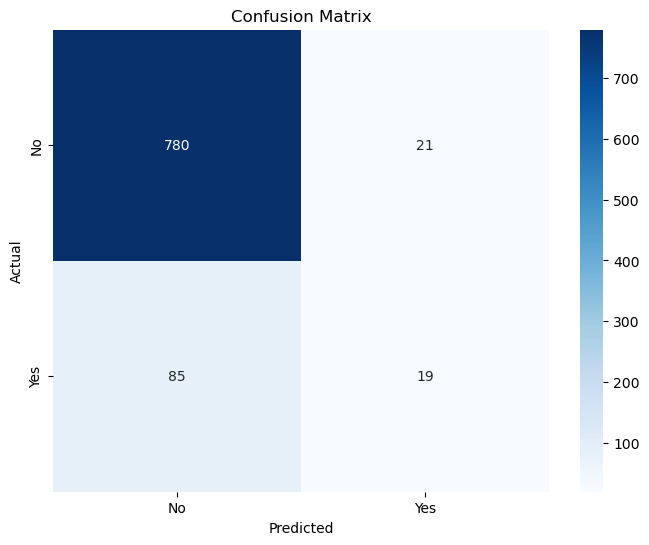

In [2]:
# 1. Load dataset
data = pd.read_csv("C:\\Users\ASUS\\Downloads\\bank.csv", sep=';')  

# 2. Preprocessing
# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['y'])  # Semua kolom kecuali target
y = data['y']  # Target kolom

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

# Evaluate Logistic Regression
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, log_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_y_pred))
print("\nClassification Report:\n", classification_report(y_test, log_y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**1. Logistic Regression**

-> Accuracy: 0.8828 (~88.28%)
Model Logistic Regression berhasil memprediksi dengan benar 88.28% dari total data uji. Ini menunjukkan kinerja model cukup baik secara keseluruhan.

-> Confusion Matrix:  
- True Negatives  (TN): 780 (Prediksi "no" benar)
- False Positives (FP): 21  (Prediksi "yes" salah)
- False Negatives (FN): 85  (Prediksi "no" salah)
- True Positives  (TP): 19  (Prediksi "yes" benar)

-> Classification Report:
- Precision untuk kelas 0 (no) : 0.90 → Dari semua prediksi "no", 90% benar
- Recall untuk kelas 0 (no) : 0.97 → Dari semua data "no", 97% berhasil terdeteksi
- Precision untuk kelas 1 (yes) : 0.47 → Dari semua prediksi "yes", hanya 47% yang benar
- Recall untuk kelas 1 (yes) : 0.18 → Dari semua data "yes", hanya 18% yang terdeteksi

**Kesimpulan Logistic Regression**

Model cenderung lebih baik dalam mendeteksi kelas mayoritas (no), tetapi kinerjanya rendah dalam mendeteksi kelas minoritas (yes) dengan recall hanya 18%.


=== Random Forest Results ===
Accuracy: 0.887292817679558

Confusion Matrix:
 [[773  28]
 [ 74  30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       801
           1       0.52      0.29      0.37       104

    accuracy                           0.89       905
   macro avg       0.71      0.63      0.65       905
weighted avg       0.87      0.89      0.87       905



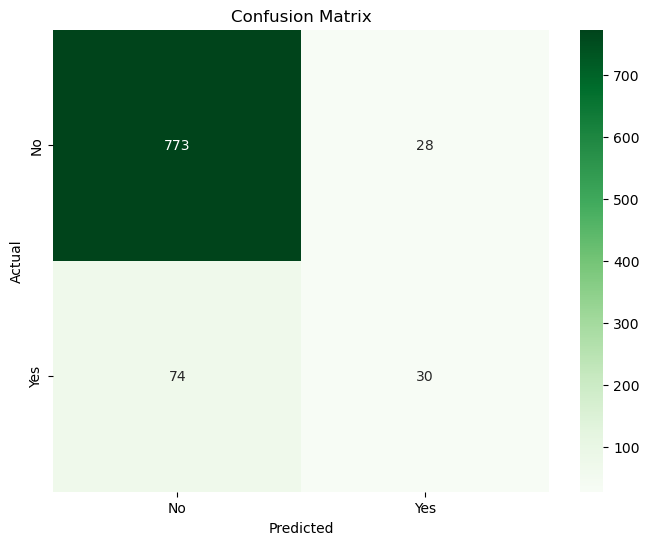

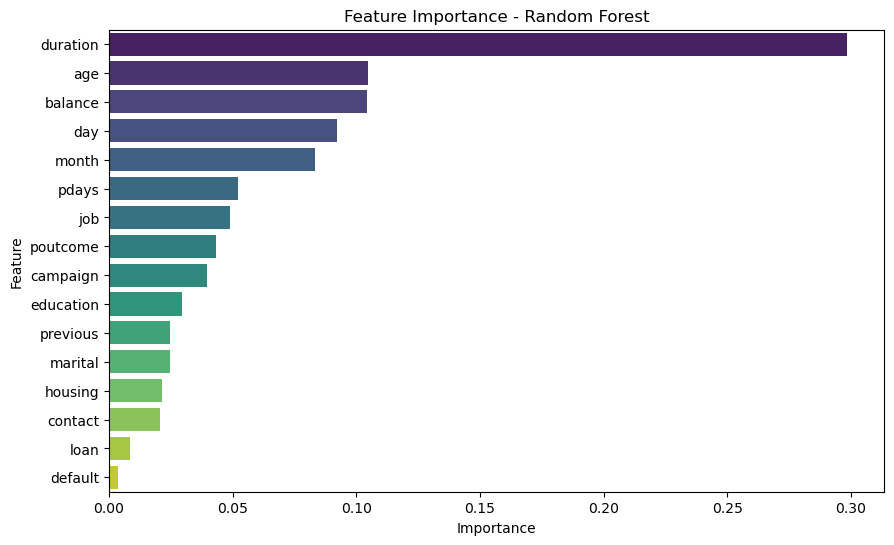

In [3]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Plot Feature Importance for Random Forest
importance = rf_model.feature_importances_
features = data.drop(columns=['y']).columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

**2. Random Forest**

-> Accuracy: 0.8873 (~88.73%)
Random Forest sedikit lebih baik dibanding Logistic Regression dalam hal akurasi keseluruhan.

-> Confusion Matrix:
- True Negatives  (TN): 773 (Prediksi "no" benar)
- False Positives (FP): 28  (Prediksi "yes" salah)
- False Negatives (FN): 74  (Prediksi "no" salah)
- True Positives  (TP): 30  (Prediksi "yes" benar)

-> Classification Report:
- Precision untuk kelas 0 (no) : 0.91 → Dari semua prediksi "no" , 91% benar
- Recall untuk kelas 0    (no) : 0.97 → Dari semua data "no"     , 97% berhasil terdeteksi
- Precision untuk kelas 1 (yes): 0.52 → Dari semua prediksi "yes", 52% benar
- Recall untuk kelas 1    (yes): 0.29 → Dari semua data "yes"    , 29% berhasil terdeteksi

**Kesimpulan Random Forest**

Model ini lebih baik dalam mendeteksi kelas minoritas (yes) dibanding Logistic Regression, dengan recall sebesar 29% (dibandingkan 18% pada Logistic Regression). Namun, model tetap lebih fokus pada kelas mayoritas (no).

Berdasarkan grafik Random Forest, fitur yang paling berpengaruh adalah:

1. Duration: Durasi kontak nasabah memiliki pengaruh terbesar pada prediksi
2. Age: Usia nasabah menjadi faktor penting
3. Balance: Saldo nasabah juga memberikan kontribusi signifikan
4. Fitur lain seperti day, month, dan pdays juga berkontribusi, tetapi dengan pengaruh yang lebih kecil

Ini menunjukkan bahwa durasi percakapan adalah indikator utama untuk menentukan apakah seseorang akan berlangganan deposito.

**KESIMPULAN**

Random Forest adalah model yang lebih baik untuk dataset ini dibanding Logistic Regression, karena memiliki kinerja yang lebih baik dalam mendeteksi kelas minoritas (yes) sekaligus mempertahankan akurasi tinggi.